Name: **Jorge García Gámiz**

Subject: Machine Learning

Date: 11/12/2024

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Part I: Data Preparation

Download the dataset `facebook.csv`

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving facebook.csv to facebook (2).csv


In [ ]:
facebook = pd.read_csv('/content/facebook.csv')
facebook

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,134115277150304_181886762373155,photo,10/8/2017 0:24,7,0,0,7,0,0,0,0,0
1,134115277150304_181804739048024,photo,10/7/2017 20:24,95,3,0,93,1,1,0,0,0
2,134115277150304_181615945733570,photo,10/7/2017 5:57,9,0,0,9,0,0,0,0,0
3,134115277150304_181523192409512,video,10/7/2017 0:56,328,662,62,222,104,0,1,1,0
4,134115277150304_181504085744756,photo,10/6/2017 23:06,557,27,2,517,36,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
394,614855718638584_685187868272035,status,12/24/2017 23:58,137,162,0,136,0,0,1,0,0
395,614855718638584_685163814941107,status,12/24/2017 23:20,7,0,1,7,0,0,0,0,0
396,614855718638584_684600291664126,video,12/24/2017 7:04,200,752,184,126,74,0,0,0,0
397,614855718638584_685187868272035,status,12/24/2017 23:58,137,162,0,136,0,0,1,0,0


Remove from the dataset the first three variables

In [ ]:
data = facebook.iloc[:, 3:]
# data = facebook.drop(columns=['status_id', 'status_type', 'status_published'])
# facebook.drop(columns=['status_id', 'status_type', 'status_published'], inplace=True)
data

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,7,0,0,7,0,0,0,0,0
1,95,3,0,93,1,1,0,0,0
2,9,0,0,9,0,0,0,0,0
3,328,662,62,222,104,0,1,1,0
4,557,27,2,517,36,3,1,0,0
...,...,...,...,...,...,...,...,...,...
394,137,162,0,136,0,0,1,0,0
395,7,0,1,7,0,0,0,0,0
396,200,752,184,126,74,0,0,0,0
397,137,162,0,136,0,0,1,0,0


# Part II

## Exercise 1

Decide the number of groups in a set, in $k$-means clustering. Write why you choose a given number of clusters. Write the number of selected clusters as your answer.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

First, we have to standarize our data

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

**The elbow method**

The elbow point is where the graph transitions from a steep slope to a flatter slope. The value of $k$ at the elbow point is considered optimal because it balances clustering performance with simplicity.

In [ ]:
wcss_list=[]

for k in range(1,20):
  kmeans_model=KMeans(n_clusters=k,random_state=1)
  kmeans_model.fit(data_scaled)
  wcss_list.append(kmeans_model.inertia_)

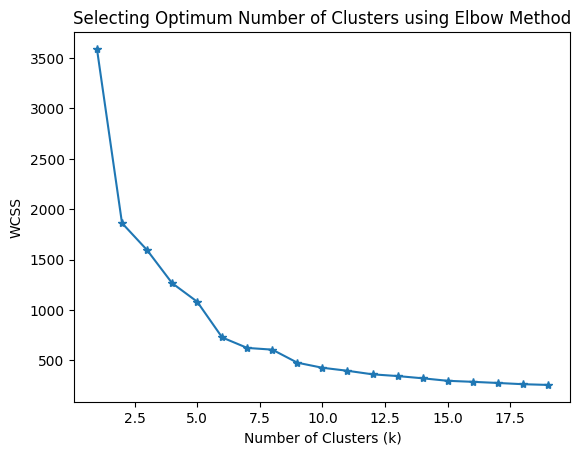

In [ ]:
# Plot the inertia (WCSS) and number of clusters
plt.plot(range(1, 20), wcss_list,  marker='*')
plt.title('Selecting Optimum Number of Clusters using Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

From here we see that potential elbows might be $k\in\{3,\dotsc,7\}$

**The silhouette method**

 The silhouette method assesses and validates cluster data. It finds how well each data point is classified. The plot of the silhouette score helps us to visualize and interpret how well data points are tightly grouped within their own clusters and separated from others. It helps us to evaluate the number of clusters. Its score ranges from $-1$ to $+1$. A positive value indicates a well-separated cluster and a negative value indicates incorrectly assigned data points. The more positive the value, the further data points are from the nearest clusters; a value of zero indicates data points that are at the separation line between two clusters. The formula for the silhouette score
 \
 $$
s(i)=\dfrac{b_i-a_i}{max(b_i,a_i)}
 $$

The closer to 1, the better the $k$

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
score_list=[]

for k in range(2,10): # starts at 2 because the silhouette score requires at least two clusters to measure separation
  kmeans_model = KMeans(n_clusters=k, random_state=1)
  kmeans_model.fit(data_scaled)
  pred = kmeans_model.predict(data_scaled)
  score = silhouette_score(data_scaled, pred, metric="euclidean") # returns the mean of the silhouette score of all points
  score_list.append(score)

In [ ]:
score_list

[0.6456622235230263,
 0.6095621703854008,
 0.6280784291271635,
 0.6426713126449589,
 0.671103761543577,
 0.6857732366562685,
 0.6601629139203351,
 0.6634736056230087]

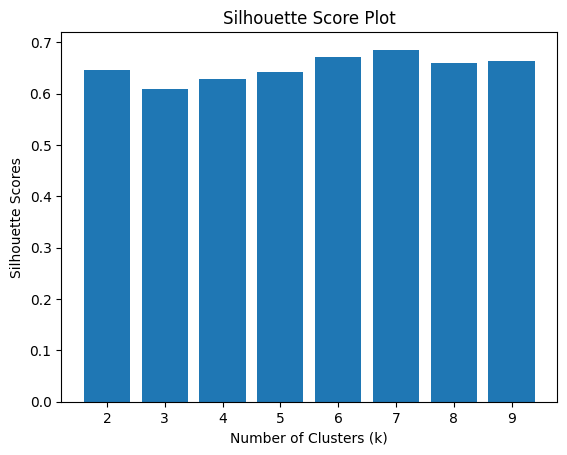

In [ ]:
# Plot the Silhouette score and number of cluster
plt.bar(range(2, 10), score_list)
plt.title('Silhouette Score Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Scores')
plt.show()

So we conclude that the best option is `num_clusters = 7`

## Exercise 2

Cluster the data using the kmeans method.

In [ ]:
num_clusters = 7

In [ ]:
km = KMeans(n_clusters=num_clusters, random_state=1)
km.fit(data_scaled)
pred = km.predict(data_scaled)
pred

array([1, 1, 1, 2, 4, 1, 2, 1, 2, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 2, 2, 1, 1, 2, 1, 1, 4, 1, 0, 2, 2,
       1, 2, 1, 2, 1, 1, 6, 6, 1, 1, 1, 1, 6, 4, 1, 6, 1, 2, 1, 1, 2, 1,
       6, 1, 2, 1, 2, 2, 1, 2, 6, 1, 2, 6, 2, 1, 0, 6, 1, 0, 1, 1, 1, 2,
       2, 1, 6, 1, 1, 1, 6, 1, 1, 2, 1, 1, 6, 6, 1, 1, 2, 0, 1, 2, 1, 0,
       0, 1, 0, 1, 1, 1, 6, 2, 1, 6, 1, 1, 6, 1, 1, 2, 6, 1, 6, 1, 1, 6,
       1, 0, 1, 1, 0, 1, 1, 6, 1, 1, 1, 1, 6, 1, 1, 1, 6, 1, 1, 1, 1, 1,
       1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 6, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 5, 3, 1, 1, 1, 6, 1, 5, 5, 1, 1, 5,
       1, 5, 5, 1, 3, 0, 3, 1, 1, 1, 0, 1, 1, 1, 4,

In [ ]:
km.inertia_

624.0353913250694

## Exercise 3

Generate a chart of the distribution of silhouettes in your clustering. Calculate the average silhouette value for the dataset in this clustering. Write its value as the answer.

In [ ]:
# This function returns the mean silhouette score for all data points in the dataset
silhouette_score(data_scaled, pred, metric="euclidean")

0.6857732366562685

In [ ]:
# This function returns the silhouette coefficient for each point in the dataset
from sklearn.metrics import silhouette_samples
silhouette_vals=silhouette_samples(data_scaled,pred)
silhouette_vals

array([ 0.8895111 ,  0.51564416,  0.8937829 ,  0.41540335,  0.26265836,
        0.89707786,  0.21336479,  0.89831522, -0.02939292,  0.73467236,
        0.88350404,  0.25797458,  0.59148243,  0.27727   ,  0.17326258,
        0.8895111 ,  0.85794368,  0.47455744,  0.8803396 ,  0.26684892,
        0.19864933,  0.29768336,  0.61716521,  0.89809733,  0.86334469,
        0.74996826,  0.87400261,  0.89912309,  0.89153231,  0.90013993,
        0.86889097,  0.17211676,  0.39745008,  0.4106502 ,  0.87149756,
        0.75122891,  0.16897255,  0.89789422,  0.85078797,  0.08213991,
        0.86234544,  0.2653907 ,  0.27626604,  0.51985979,  0.82473344,
        0.32420273,  0.88777872,  0.59384547,  0.89631683,  0.89188685,
        0.10680468,  0.04891514,  0.8913848 ,  0.88348746,  0.90054687,
        0.83780325,  0.3212615 ,  0.70571174,  0.89495047,  0.26993617,
        0.85315533,  0.43288254,  0.89707786,  0.41064588,  0.56810356,
        0.89890975,  0.19099634,  0.89707786,  0.27411898,  0.89

In [ ]:
cluster_labels=np.unique(pred)
cluster_labels

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [ ]:
from matplotlib import cm # cm class: built-in colormaps, colormap handling utilities

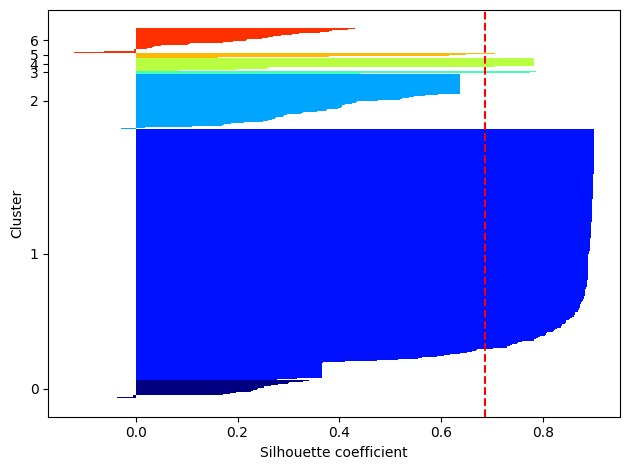

In [ ]:
y_ax_lower, y_ax_upper = 0, 0 # vertical bounds of the bar plot for each cluster
                              # the range from y_ax_lower to y_ax_upper represents the vertical span for a given cluster
yticks = [] # vertical midpoint for each cluster's bar (just for labeling on the y-axis of the figure)
for i, c in enumerate(cluster_labels):
    '''
    This loop creates horizontal bar plots for the silhouette values of each cluster,
    stacking them vertically for visualization. Each bar represents the silhouette values
    of points within a single cluster, sorted in ascending order.
    '''
    c_silhouette_vals = silhouette_vals[pred == c] # a list with all silhouettle values from the same cluster
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals) # moves the upper limit by the number of points in the current cluster
    color = cm.jet(float(i) / num_clusters) # assigns a unique color to each cluster based on its index
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.) # appends the vertical midpoint of the bar for labeling this cluster on the y-axis
    y_ax_lower += len(c_silhouette_vals) # updates the starting position for the next cluster (y_ax_lower=y_ax_upper, ONLY AT THIS POINT)

# Compute the average silhouette score across all clusters and plot it as a vertical dashed red line
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels) # just to label the clusters on the y-axis of the figure
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
#Procedures that adjust the parameters of the plot so that they are well matched to the figure.
plt.tight_layout()
plt.show()

## Exercise 4

Transfer the observations from the largest cluster into a data frame, name it with your name, describe this cluster you have found. Give the distribution(proportion) of the variable `status_type` in your largest cluster.

In [ ]:
data.loc[:, 'cluster'] = pred
data

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,7,0,0,7,0,0,0,0,0,1
1,95,3,0,93,1,1,0,0,0,1
2,9,0,0,9,0,0,0,0,0,1
3,328,662,62,222,104,0,1,1,0,2
4,557,27,2,517,36,3,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...
394,137,162,0,136,0,0,1,0,0,1
395,7,0,1,7,0,0,0,0,0,1
396,200,752,184,126,74,0,0,0,0,2
397,137,162,0,136,0,0,1,0,0,1


In [ ]:
summary=data.groupby('cluster').mean()
summary['count']=data['cluster'].value_counts()
summary = summary.sort_values(by='count', ascending=False)
summary

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,count
cluster,,,,,,,,,,
1,29.118081,10.380074,0.391144,28.800738,0.199262,0.047970,0.070111,0.188192,0.254613,271
2,214.915254,735.694915,176.355932,136.016949,77.440678,0.271186,0.932203,0.135593,0.118644,59
6,291.153846,1151.923077,259.461538,170.807692,115.500000,2.153846,1.846154,0.423077,4.269231,26
0,304.950000,1498.650000,291.800000,190.300000,108.050000,0.650000,4.850000,0.400000,1.100000,20
4,254.571429,137.500000,13.928571,237.571429,13.642857,2.857143,0.428571,0.071429,0.000000,14
5,46.833333,158.000000,40.833333,37.166667,9.666667,0.000000,0.000000,53.000000,3.500000,6
3,19.666667,0.000000,0.333333,19.666667,0.000000,0.000000,0.000000,4.000000,84.000000,3


Here we observe that the largest cluster is indeed Cluster 1. We see that the main difference with the other Clusters (except for Clusters 3 and 5) is that users in this cluster are much less popular. We see that in this cluster `num_likes`, `num_comments`, `num_loves` and `num_reactions` are all much lower than in the other ones (Clusters 2, 6, 0, 4). On the other hand, the main difference with Cluster 3 is the `num_angrys`: we see that the Cluster 3 has a high number of angries, while Cluster 1 keeps this number low. And with Cluster 5, the main difference is `num_sads`, which is much higher in Cluster 5.

So even if users in Cluster 1 are not popular (unlike Clusters 2,6,0,4), at least they don't make people angry (unlike Cluster 3) or sad (unlike Cluster 5).

In [ ]:
jorge = facebook[data['cluster'] == 1]
jorge

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,134115277150304_181886762373155,photo,10/8/2017 0:24,7,0,0,7,0,0,0,0,0
1,134115277150304_181804739048024,photo,10/7/2017 20:24,95,3,0,93,1,1,0,0,0
2,134115277150304_181615945733570,photo,10/7/2017 5:57,9,0,0,9,0,0,0,0,0
5,134115277150304_181200092441822,photo,10/6/2017 1:04,11,0,0,11,0,0,0,0,0
7,134115277150304_181004365794728,photo,10/5/2017 9:02,15,10,0,14,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
392,614855718638584_684613778329444,status,12/24/2017 7:16,19,2,0,19,0,0,0,0,0
394,614855718638584_685187868272035,status,12/24/2017 23:58,137,162,0,136,0,0,1,0,0
395,614855718638584_685163814941107,status,12/24/2017 23:20,7,0,1,7,0,0,0,0,0
397,614855718638584_685187868272035,status,12/24/2017 23:58,137,162,0,136,0,0,1,0,0


In [ ]:
jorge.status_type.value_counts(normalize=True)

,proportion
status_type,
photo,0.726937
status,0.169742
video,0.103321


<Axes: xlabel='status_type', ylabel='count'>

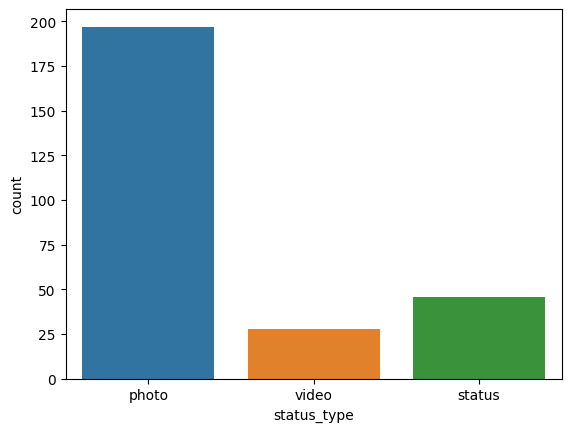

In [ ]:
sns.countplot(x="status_type", data=jorge, hue="status_type")

## Exercise 5

Plot a dataset as a hierarchically-clustered heatmap.

<Axes: >

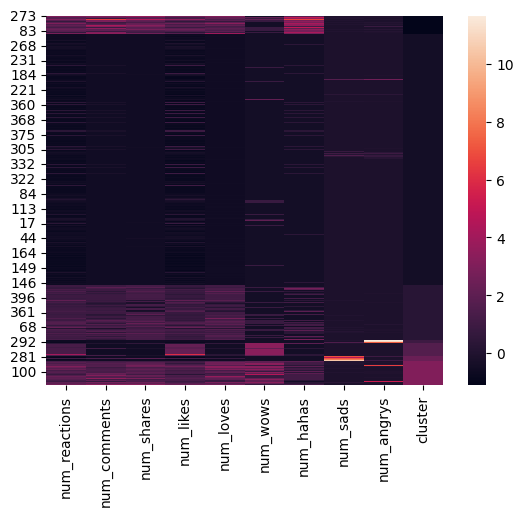

In [ ]:
data_scaled = scaler.fit_transform(data)
df = pd.DataFrame(data_scaled, columns=data.columns).sort_values(by='cluster')
sns.heatmap(df)

<Axes: >

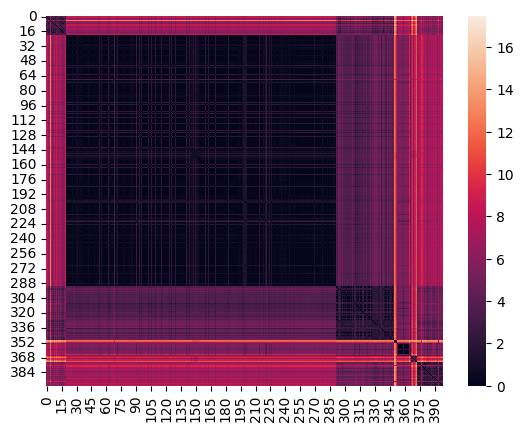

In [ ]:
from scipy.spatial.distance import pdist, squareform

'''
 - Computes the pairwise distances between rows in df
'''
dist = pdist(df, metric='euclidean')

'''
 - Converts the condensed distance array into a square, symmetric matrix.
 - Each entry (i, j) represents the distance between row i and row j in df.
'''
dist = squareform(dist)

sns.heatmap(dist)